In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random

In [8]:
paths = [['PV','X','MET'], ['PV','X','e+'],['PV','X','e-'],
         ['PV','Y','Z','W','MET'],['PV','Y','Z','W','L'],['PV','Y','Z','jetA'],['PV','Y','Z','jetB'],['PV','Y','mu-']]
g,root = nx.prefix_tree(paths)
g.remove_node(root)
for n in g.nodes():
    if g.out_degree[n] == 0:
        g.remove_node(n)
        break
labelsDict = {}
#Set labels for comparison
for n in g.nodes():
    labelsDict[n] = g.nodes[n]['source']

In [9]:
random.shuffle(paths)
gB,root = nx.prefix_tree(paths)
gB.remove_node(root)
for n in gB.nodes():
    if gB.out_degree[n] == 0:
        gB.remove_node(n)
        break

labelsDictB = {}
#Set labels for comparison
for n in gB.nodes():
    labelsDictB[n] = gB.nodes[n]['source']

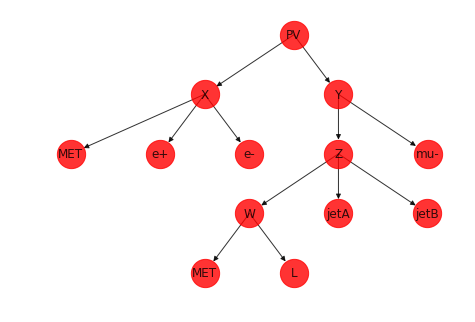

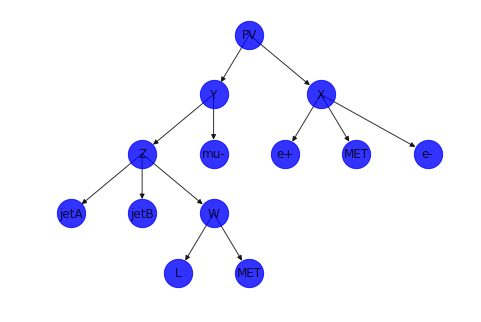

In [17]:
pos =graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=True,arrows=True,labels=labelsDict,node_size=800,alpha=0.8)
plt.show()
pos =graphviz_layout(gB, prog='dot')
nx.draw(gB,pos,with_labels=True,arrows=True,labels=labelsDictB,node_size=800,alpha=0.8,node_color='b')
plt.show()

In [55]:
def setLevel(g,nodeList=None,lvl=0):
    
    if nodeList is None:
        nodeList = [n for n in g.nodes() if g.out_degree[n] == 0]        
        for n in g.nodes():
            g.nodes[n]['level'] = 0
            
    for n in nodeList:
        g.nodes[n]['level'] = max(lvl,g.nodes[n]['level'])
        setLevel(g,g.predecessors(n),lvl + 1)
        
        
def setTuples(g,node=None):
    
    if node is None:
        node = [n for n in g.nodes() if g.in_degree[n] == 0][0]
        for n in g.nodes():
            g.nodes[n]['tuple'] = []
           
    suc = list(g.successors(node))
    if not suc:
        g.nodes[node]['tuple'] = 10
    else:
        for n in suc:
            setTuples(g,n)
        tp = sorted([g.nodes[n]['tuple'] for n in suc])
        g.nodes[node]['tuple'] = int(str(tp).replace("'","").replace(",","").replace('[','1').replace(']','0').replace(" ",""))

def getLevels(T):

    root = [n for n in g.nodes() if T.in_degree[n] == 0][0]
    levels = nx.single_source_shortest_path_length(T,root)
    levelsDict = {}
    for n,lvl in levels.items():
        if lvl in levelsDict:
            levelsDict[lvl].append(n)
        else:
            levelsDict[lvl] = [n]
    levelsList = sorted(list(levelsDict.items()))
    return levelsList

    
def compareTopologies(T1,T2):
    
    levels1 = getLevels(T1)
    levels2 = getLevels(T2)

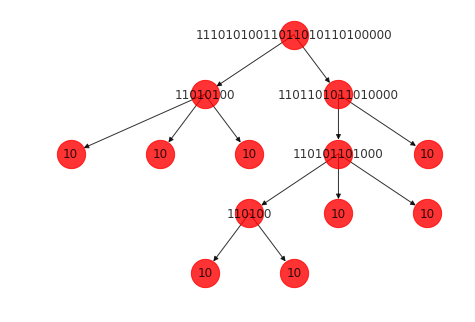

In [56]:
setTuples(g)
levelDict = dict([[n,g.nodes[n]['tuple']] for n in g.nodes()])
pos =graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=True,arrows=True,labels=levelDict,node_size=800,alpha=0.8)
plt.show()

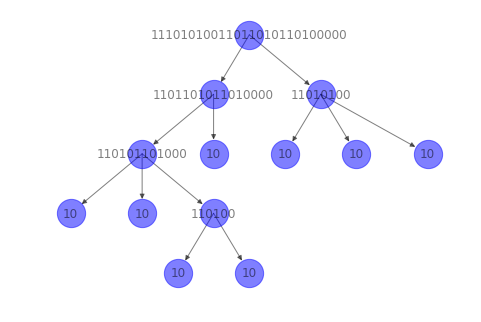

In [57]:
setTuples(gB)
levelDict = dict([[n,gB.nodes[n]['tuple']] for n in gB.nodes()])
pos =graphviz_layout(gB, prog='dot')
nx.draw(gB,pos,with_labels=True,arrows=True,labels=levelDict,node_size=800,alpha=0.5,node_color='b')
plt.show()

In [58]:
rootA = [n for n in g.nodes() if g.in_degree[n] == 0][0]
rootB = [n for n in gB.nodes() if gB.in_degree[n] == 0][0]
print(g.nodes[rootA]['tuple'] == gB.nodes[rootB]['tuple'])
print(g.nodes[rootA]['tuple'])
print(gB.nodes[rootB]['tuple'])

True
11101010011011010110100000
11101010011011010110100000


[(0, ['PV']), (1, ['X', 'Y']), (2, ['MET', 'e+', 'e-', 'Z', 'mu-']), (3, ['W', 'jetA', 'jetB']), (4, ['MET', 'L'])]


In [63]:
g.data['source']

AttributeError: 'DiGraph' object has no attribute 'data'